In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("../datasets/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("../datasets/house-prices-advanced-regression-techniques/test.csv")

In [5]:
train_data.shape

(1460, 81)

In [22]:
test_data.shape

(1459, 80)

In [7]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

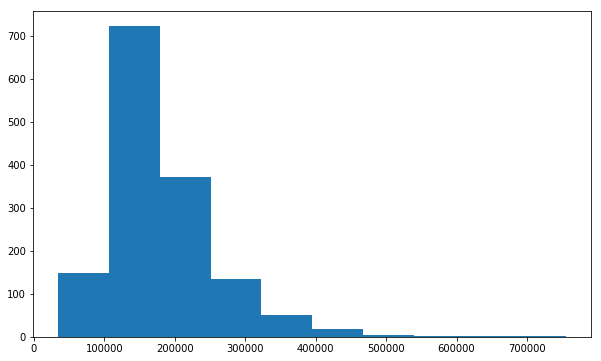

In [12]:
plt.figure(figsize=(10,6))
plt.hist(train_data["SalePrice"])

#### El precio de venta no se distribuye uniformemente y está sesgado hacia la izquierda. Por lo tanto, utilizamos log1p para eliminar la asimetría.

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46027076, 10.76769112, 11.07511148, 11.38253184, 11.6899522 ,
        11.99737256, 12.30479292, 12.61221328, 12.91963363, 13.22705399,
        13.53447435]),
 <a list of 10 Patch objects>)

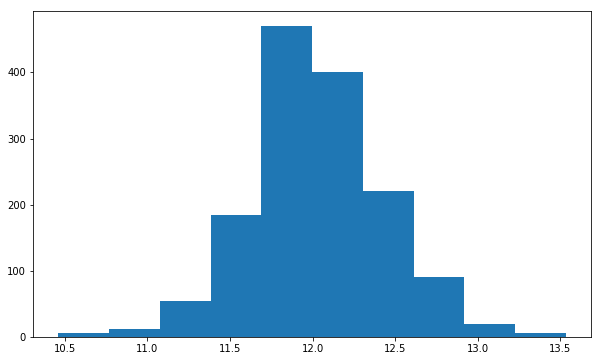

In [15]:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])
plt.figure(figsize=(10,6))
plt.hist(train_data["SalePrice"])

In [17]:
x = train_data.drop(["SalePrice"], axis=1)
y = train_data["SalePrice"]

In [27]:
features = pd.concat([x, test_data], axis=0)
features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [24]:
features.shape

(2919, 80)

In [34]:
features["Functional"] = features["Functional"].fillna("Typ")
features["Electrical"] = features["Electrical"].fillna("SBrkr")
features["KitchenQual"] = features["KitchenQual"].fillna("TA")
features["PoolQC"] = features["PoolQC"].fillna("None")

#### Rellenando con la moda, es decir, el valor más frecuente en estas columnas

In [40]:
features["Exterior1st"] = features["Exterior1st"].fillna(features["Exterior1st"].mode())
features["Exterior2nd"] = features["Exterior2nd"].fillna(features["Exterior2nd"].mode())
features["SaleType"] = features["SaleType"].fillna(features["SaleType"].mode())

#### Los datos faltantes en GarageYrBit probablemente signifiquen que falta garage, así que reemplazamos NaN con cero

In [41]:
for col in ("GarageYrBlt", "GarageArea", "GarageCars"):
    features[col] = features[col].fillna(0)
    
for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond"):
    features[col] = features[col].fillna("None")
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna("None")

In [44]:
for col in features.columns:
    if features[col].dtype == object:
        features[col] = features[col].fillna("None")

#### Rellenamos los Na en las columnas numéricos con la mediana de dicha columna

In [47]:
numeric_types = ["int16", "int32", "int64", "float16", "float32", "float64"]

for col in features.columns:
    if features[col].dtype in numeric_types:
        features[col] = features[col].fillna(features[col].median())

In [49]:
features.isna().any().head()

Id             False
MSSubClass     False
MSZoning       False
LotFrontage    False
LotArea        False
dtype: bool

In [51]:
features.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,8,2007,WD,Normal
7,8,60,RL,68.0,10382,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,1,2008,WD,Normal


In [53]:
features.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [54]:
# Eliminando características poco útiles
features.drop(["Utilities", "Street", "PoolQC"], axis=1, inplace=True)

In [56]:
# Añadiendo nuevas características

features["YrBltAndRemod"] = features.YearBuilt + features.YearRemodAdd
features["TotalSF"] = features.TotalBsmtSF + features["1stFlrSF"] + features["2ndFlrSF"]
features["Total_sqr_footage"] = features.BsmtFinSF1+features.BsmtFinSF2+features["1stFlrSF"]+features["2ndFlrSF"]
features["Total_Bathrooms"] = features.FullBath+0.5*features.HalfBath+features.BsmtFullBath+0.5*features.BsmtHalfBath
features["Total_porch_sf"] = features.OpenPorchSF+features["3SsnPorch"]+features.EnclosedPorch+features.ScreenPorch+features.WoodDeckSF

In [60]:
def transform(x):
    if x > 0:
        return 1 
    else:
        return 0

In [62]:
features["haspool"] = features["PoolArea"].apply(transform)
features["has2ndfloor"] = features["2ndFlrSF"].apply(transform)
features["hasgarage"] = features["GarageArea"].apply(transform)
features["hasbsmt"] = features["TotalBsmtSF"].apply(transform)
features["hasfirstplace"] = features["Fireplaces"].apply(transform)

In [64]:
features.shape

(2919, 87)

In [65]:
final_features = pd.get_dummies(features)
final_features.shape

(2919, 309)

In [113]:
train = final_features.iloc[:len(y), ]
test = final_features.iloc[len(y):, ]

In [69]:
train.shape

(1460, 309)

In [70]:
test.shape

(1459, 309)

In [71]:
y.shape

(1460,)

### Model

In [99]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [116]:
outliers = [30, 88, 462, 631, 1322]
train = train.drop(train.index[outliers])
y = y.drop(y.index[outliers])

overfit = []
for i in train.columns:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
train = train.drop(overfit, axis=1)
test = test.drop(overfit, axis=1)
overfit

['MSZoning_None', 'Exterior1st_None', 'Exterior2nd_None', 'SaleType_None']

In [96]:
train.shape, y.shape, test.shape

((1455, 305), (1455,), (1459, 305))

In [100]:
model = LinearRegression()
model.fit(train, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
model.score(train, y)

0.9467085042545724

In [117]:
prediction = model.predict(test)

In [118]:
test["Predicted SalePrice"] = prediction
test.head(15)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Predicted SalePrice
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0.0,...,0,0,1,0,0,0,0,1,0,12.094217
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790.0,...,0,0,1,0,0,0,0,1,0,12.246380
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275.0,...,0,0,1,0,0,0,0,1,0,12.532238
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49.0,...,0,0,1,0,0,0,0,1,0,11.863454
1459,1460,20,75.0,9937,5,6,1965,1965,0.0,830.0,...,0,0,1,0,0,0,0,1,0,11.887356
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,1,0,0,0,0,1,0,11.720105
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,1,0,0,0,0,1,0,12.010567
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,1,0,0,0,0,1,0,12.115308
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,1,0,0,0,0,1,0,12.217320
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,1,0,0,0,0,1,0,12.165718
